In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Flocon de von Koch

Le flocon de von Koch est une fractale dont des approximations arbitrairement proches peuvent être obtenues de la manière récurrente par l'algorithme suivant :
1. Commencer à partir d'une ligne polygonale quelconque du plan. (Le flocon canonique de von Koch se construit à partir d'un triangle équilatéral ayant une base parallèle à l'axe des abscisses.)
2. Pour chaque segment de la ligne on divise le segment en trois segments de longueurs égales, on construit un triangle équilatéral ayant pour base le segment médian et on supprime le segment qui était la base du triangle.
<img src="chapeau.png"/>
3. Recommencer à la deuxième étape avec la nouvelle ligne polygonale obtenue.
<img src="von_koch.png"/>

Commençons par créer les deux lignes brisées initiales permettant de construire les flocons.

1. La première ligne est constituée de deux points de coordonnées $(0,0)$ et $(1,0)$ par exemple. Créez une fonction `init_0()` qui retourne un tableau numpy de taille $(2,2)$ contenant ces points.

2. La seconde ligne est constituée de quatre points de coordonnées $(0,0)$, $(1/2,\sin(\pi/3))$, $(1,0)$ et finalement $(0,0)$ pour revenir au point de départ. Créez une fonction `init_1()` qui retourne un tableau numpy de taille $(2,4)$ contenant ces points.

In [2]:
def init_0():
    return np.array([[0,1],[0,0]])
def init_1():
    return np.array([[0,1/2,1,0],[0,np.sin(np.pi/3),0,0]])

Tracez les deux lignes brisées intiales

[0.  0.5 1.  0. ]
[0.        0.8660254 0.        0.       ]


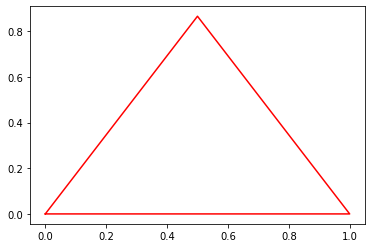

In [3]:
x = init_1()[0]
print(x)
y = init_1()[1]
print(y)
plt.plot(x,y,color='r')
# plt.scatter(x, y, color='b')

Programmez une fonction `construire_chapeau(extremites)` qui prend en argument un tableau `extremites` de taille $ 2 \times 2 $ contenant les coordonnées des extremités d'un segment et qui renvoit un tableau `points` de taille $ 2 \times 5 $ contenant les coordonnées des sommets de la ligne polygonale (&laquo; le chapeau de sorcière &raquo;) construite à partir de ce segment à l'étape 2 de l'algorithme.

[[0, 33.333333333333336, 50.0, 66.66666666666666, 100], [0, 0.0, 28.86751345948129, 0.0, 0]]


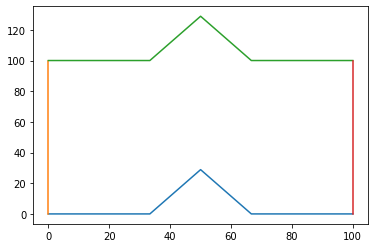

In [14]:
def construire_chapeau(extremites):
    dx = extremites[0][1] - extremites[0][0]
    dy = extremites[1][1] - extremites[1][0]
    
    milieu = [extremites[0][0] + dx/2, extremites[1][0] + dy/2]
    
    long = dx/3
    high = dy/3
    h = np.sqrt(long**2-(long/2)**2)
    v = [[-extremites[0][1],-extremites[1][1]],[extremites[0][0],extremites[0][1]]] # tourner 90 degrees
    distance = np.sqrt(dx**2+dy**2)
    h /= distance
    v = [[-extremites[0][1]*h,-extremites[1][1]*h],[extremites[0][0]*h,extremites[0][1]*h]]
    p = [milieu[0]+v[1][0],milieu[1]+v[1][1]] # coordonner de sommet
    
    xP = [extremites[0][0],extremites[0][0]+long,p[0],extremites[0][1]-long,extremites[0][1]]
    yP = [extremites[1][0],extremites[1][0]+high,p[1],extremites[1][1]-high,extremites[1][1]]
    
    points = [[],[]]
    for i in range(5):
        points[0].append(xP[i])
        points[1].append(yP[i])       
    return points
        
    return points

p=construire_chapeau([[0,100],[0,0]])
p1=construire_chapeau([[0,0],[0,100]])
p2=construire_chapeau([[0,100],[100,100]])
p3=construire_chapeau([[100,100],[100,0]])
print(p)

ax3=plt.axes()
ax3.plot(p[0],p[1])
ax3.plot(p1[0],p1[1])
ax3.plot(p2[0],p2[1])
ax3.plot(p3[0],p3[1])

Tracez la première itération pour les deux données initiales

Proposez une fonction qui prend en argument une ligne brisée et un entier n et qui retourne la ligne obtenue après n itérations. Cette fonction pourra être récursive

Tracez les flocons pour n allant de 0 à 4.